### This script contains the following:

#### 1. Import Libraries and data
#### 2. Merge Dataframes into one dataframe
#### 3. Consistency checks & preprocessing
#### 4. Define X and y and split the merged dataframe into training and testing sets
#### 5. Decision tree
#### 6. Confusion Matrix

## Import Libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import os
import operator
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from mpl_toolkits import mplot3d
from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
from sklearn.neighbors import KNeighborsClassifier

In [3]:
## Path
path = r'//Users/urvi/Desktop/Machine Learning with Python/Achivement 1/Climate Wins /02 Data'

In [4]:
#Import Dataset-weather-prediction-dataset-processed_scaled.pkl
climate=pd.read_csv(os.path.join(path,'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)

In [5]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [6]:
print(climate.columns.tolist())

['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_pr

In [7]:
# Drop the columns for GDANSK, ROMA, and TOURS from the scaled data set
climate2 = climate.drop(columns=['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max', 'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean', 'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max'])

In [8]:
climate2.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [9]:
climate2.shape

(22950, 149)

In [10]:
print(climate2.columns.tolist())

['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_pr

In [11]:
# Import library
from sklearn.multioutput import MultiOutputClassifier

In [13]:
# Import Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv
answers=pd.read_csv(os.path.join(path,'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [14]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
answers.shape

(22950, 16)

### Merge Dataframes into one dataframe

In [16]:
#Merge climate2 dataframe with answers dataframe
df_merged = climate2.merge(answers, on = 'DATE', indicator = True)

In [17]:
df_merged.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather,_merge
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,0,0,0,0,0,0,0,0,0,both
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,0,0,0,0,0,0,0,0,0,both
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,0,0,0,0,0,0,0,0,0,both
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,0,0,0,0,0,0,0,0,0,both
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,0,0,0,0,0,0,0,0,0,both


In [18]:
print(df_merged.columns.tolist())

['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_pr

### Consistency checks & preprocessing

In [19]:
# Drop the columns for 'DATE', 'MONTH', '_merge' from the df_merged data set
df_merged2 = df_merged.drop(columns=['DATE', 'MONTH', '_merge'])

In [20]:
df_merged2.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,...,0,0,0,0,0,0,0,0,0,0
1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,6.1,3.3,...,0,0,0,0,0,0,0,0,0,0
2,8,2.1,0.90,1.018,0.18,0.30,0,0.0,8.5,5.1,...,0,0,0,0,0,0,0,0,0,0
3,3,2.1,0.92,1.018,0.58,0.00,0,4.1,6.3,3.8,...,0,0,0,0,0,0,0,0,0,0
4,6,2.1,0.95,1.018,0.65,0.14,0,5.4,3.0,-0.7,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Check for missing values

df_merged2.isnull().sum()

BASEL_cloud_cover             0
BASEL_wind_speed              0
BASEL_humidity                0
BASEL_pressure                0
BASEL_global_radiation        0
                             ..
MUNCHENB_pleasant_weather     0
OSLO_pleasant_weather         0
SONNBLICK_pleasant_weather    0
STOCKHOLM_pleasant_weather    0
VALENTIA_pleasant_weather     0
Length: 162, dtype: int64

In [22]:
# Check for duplicate values

dups = df_merged2.duplicated()

In [23]:
dups

0        False
1        False
2        False
3        False
4        False
         ...  
22945    False
22946    False
22947    False
22948    False
22949    False
Length: 22950, dtype: bool

#### No missing values and no duplicate values

### Define X and y and split the merged dataframe into training and testing sets

In [24]:
X = df_merged2.drop(columns=['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather', 'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather', 'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather', 'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather'])
y = df_merged2[['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather', 'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather', 'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather', 'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather']]

In [25]:
# Split the merged DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18360, 147)
(4590, 147)
(18360, 15)
(4590, 15)


### Decision Tree

[Text(0.3641470353296773, 0.9827586206896551, 'x[49] <= 17.95\ngini = 0.316\nsamples = 18360\nvalue = [[13795, 4565]\n[11929, 6431]\n[12390, 5970]\n[14779, 3581]\n[14401, 3959]\n[14336, 4024]\n[15329, 3031]\n[13213, 5147]\n[14527, 3833]\n[10146, 8214]\n[14545, 3815]\n[15456, 2904]\n[18360, 0]\n[15254, 3106]\n[17414, 946]]'),
 Text(0.061010369096573876, 0.9482758620689655, 'x[98] <= 17.95\ngini = 0.099\nsamples = 11482\nvalue = [[10770, 712]\n[9636, 1846]\n[10134, 1348]\n[11390, 92]\n[11482, 0]\n[10809, 673]\n[11401, 81]\n[10463, 1019]\n[11409, 73]\n[8535, 2947]\n[11054, 428]\n[11199, 283]\n[11482, 0]\n[11217, 265]\n[11311, 171]]'),
 Text(0.017509581838730283, 0.9137931034482759, 'x[19] <= 17.95\ngini = 0.028\nsamples = 8036\nvalue = [[7905, 131]\n[7300, 736]\n[7660, 376]\n[8022, 14]\n[8036, 0]\n[7994, 42]\n[8015, 21]\n[7805, 231]\n[8013, 23]\n[8036, 0]\n[7887, 149]\n[7998, 38]\n[8036, 0]\n[8010, 26]\n[8021, 15]]'),
 Text(0.0077692742371382245, 0.8793103448275862, 'x[78] <= 17.95\ngini 

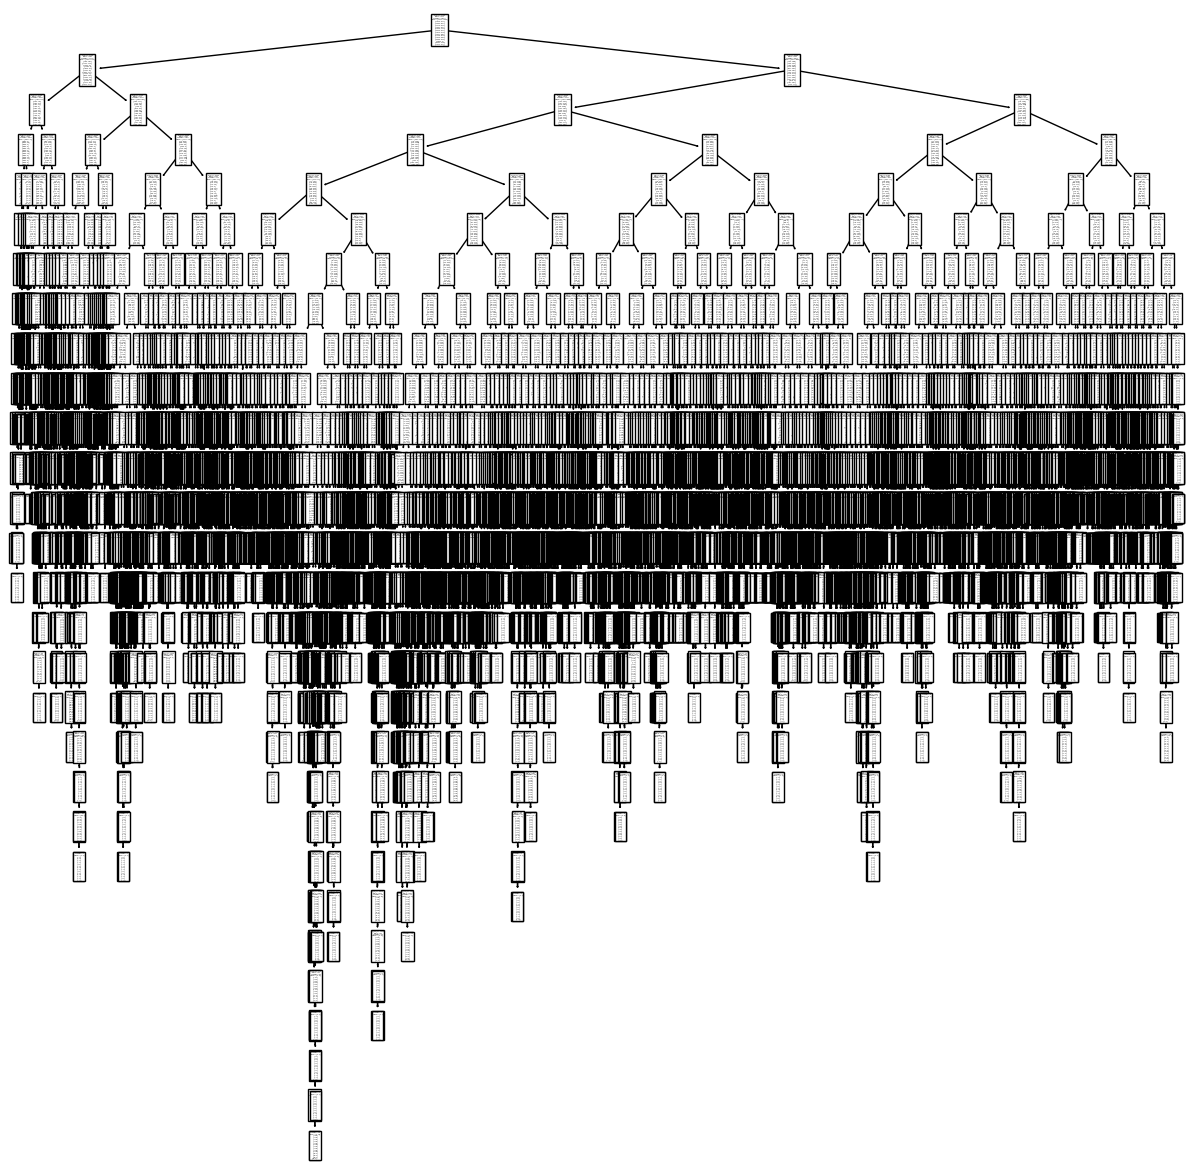

In [27]:
# Run Decision Tree classifier
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(weather_dt)

In [28]:
# What is the training accuracy score? Using the cross validation method
y_pred_train = weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6039215686274509


### Confusion Matrix

In [30]:
# Convert X_train, X_test, and y_train to NumPy arrays
X_train_array = X_train.values
X_test_array = X_test.values
y_train_array = y_train.values
y_test_array = y_test.values

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
classifier = MultiOutputClassifier(knn, n_jobs=-1)
    
## Fit the model on the training data.
classifier.fit(X_train_array, y_train_array)  # Use arrays instead of DataFrame
    
y_pred = classifier.predict(X_test_array)  # Use arrays instead of DataFrame

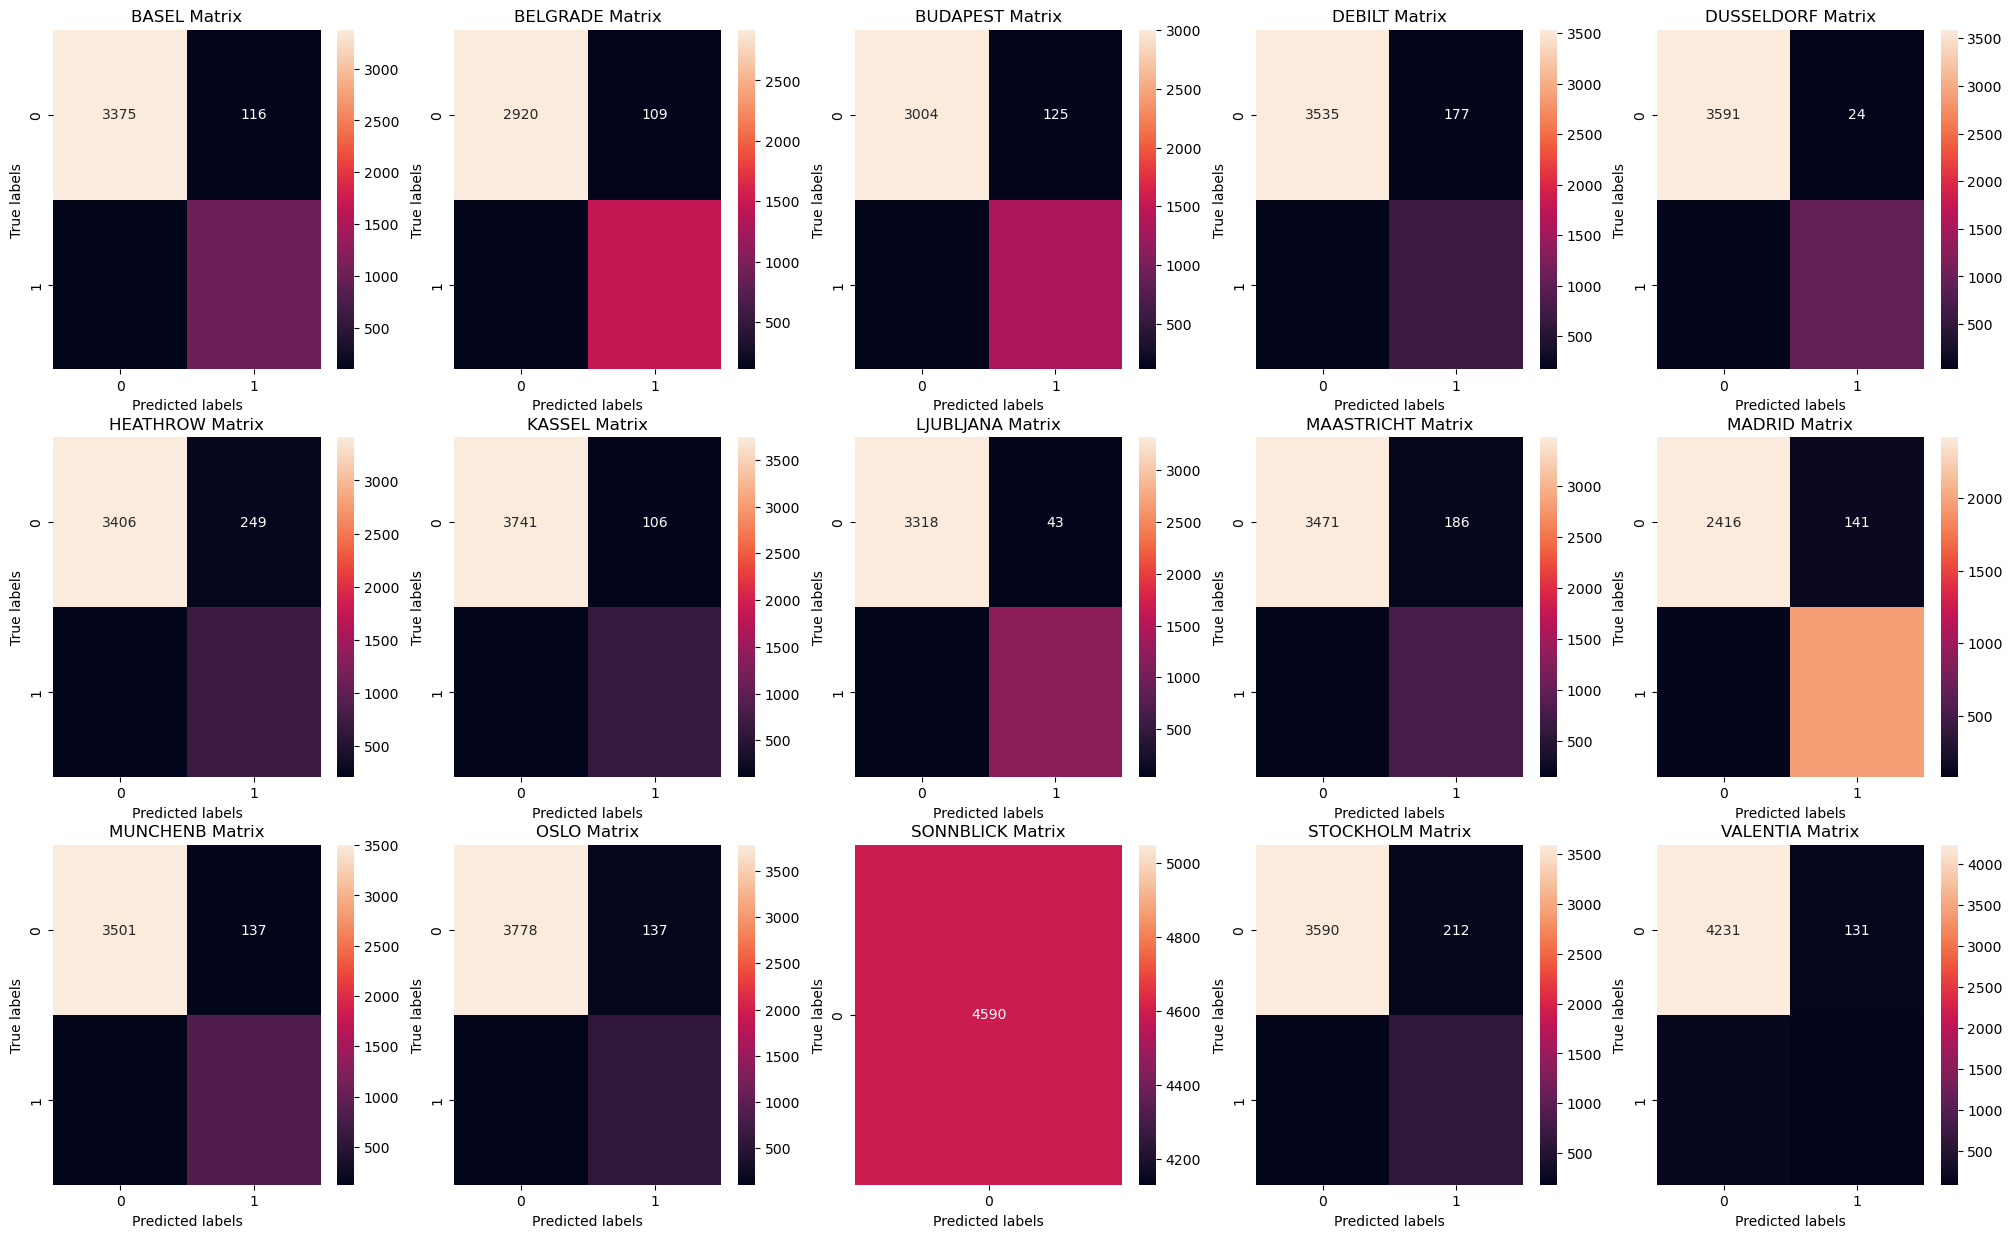

In [34]:
locations = list({x.split('_')[0] for x in df_merged2.columns if x not in ['MONTH', 'DATE']})
locations.sort()
locations
key = '_pleasant_weather'
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [35]:
# What is the testing accuracy score? Using the cross validation method
y_pred = weather_dt.predict(X_test_array)
print('Test accuracy score: ',accuracy_score(y_test_array, y_pred))
multilabel_confusion_matrix(y_test_array, y_pred)

Test accuracy score:  0.6381263616557734


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([[[3375,  116],
        [ 100,  999]],

       [[2920,  109],
        [ 109, 1452]],

       [[3004,  125],
        [ 111, 1350]],

       [[3535,  177],
        [ 171,  707]],

       [[3591,   24],
        [  33,  942]],

       [[3406,  249],
        [ 206,  729]],

       [[3741,  106],
        [ 109,  634]],

       [[3318,   43],
        [  36, 1193]],

       [[3471,  186],
        [ 148,  785]],

       [[2416,  141],
        [  80, 1953]],

       [[3501,  137],
        [ 124,  828]],

       [[3778,  137],
        [ 106,  569]],

       [[4590,    0],
        [   0,    0]],

       [[3590,  212],
        [ 183,  605]],

       [[4231,  131],
        [ 145,   83]]])